## Setup

In [19]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency, calculate_poisson_predictions, calculate_negative_binomial_predictions, format_prediction_table, get_phrases, process_json
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime

In [20]:
PHRASES = get_phrases("KXTNFMENTION-25OCT02") + ['baseball', 'dodgers']

SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'Down to the wire': "\\b(?:\\w+-)*(?:down[\\s,\\-]+to[\\s,\\-]+the[\\s,\\-]+wire|down[\\s,\\-]+to[\\s,\\-]+the[\\s,\\-]+wires|down[\\s,\\-]+to[\\s,\\-]+the[\\s,\\-]+wire's|down[\\s,\\-]+to[\\s,\\-]+the[\\s,\\-]+wires'|down[\\s,\\-]+to[\\s,\\-]+thes[\\s,\\-]+wire|down[\\s,\\-]+to[\\s,\\-]+thes[\\s,\\-]+wires|down[\\s,\\-]+to[\\s,\\-]+thes[\\s,\\-]+wire's|down[\\s,\\-]+to[\\s,\\-]+thes[\\s,\\-]+wires'|down[\\s,\\-]+to[\\s,\\-]+the's[\\s,\\-]+wire|down[\\s,\\-]+to[\\s,\\-]+the's[\\s,\\-]+wires|down[\\s,\\-]+to[\\s,\\-]+the's[\\s,\\-]+wire's|down[\\s,\\-]+to[\\s,\\-]+the's[\\s,\\-]+wires'|down[\\s,\\-]+to[\\s,\\-]+thes'[\\s,\\-]+wire|down[\\s,\\-]+to[\\s,\\-]+thes'[\\s,\\-]+wires|down[\\s,\\-]+to[\\s,\\-]+thes'[\\s,\\-]+wire's|down[\\s,\\-]+to[\\s,\\-]+thes'[\\s,\\-]+wires'|down[\\s,\\-]+tos[\\s,\\-]+the[\\s,\\-]+wire|down[\\s,\\-]+tos[\\s,\\-]+the[\\s,\\-]+wires|down[\\s,\\-]+tos[\\s,\\-]+the[\\s,\\-]+wire's|down[\\s,\\-]+tos[\\s,\\-]+the[\\s,\\-]+wires'|down[\\s,\\-]+tos[\\s,\\-]+thes[\

In [21]:
# Process transcripts

df = process_directory('../data-football/tnf-audio/transcripts', SEARCH_PHRASES)

# Print dataset statistics
print("Dataset Statistics:")

print(f"\nAll Transcripts:")
print(f"Total: {len(df)}")

print("\nWord Count Statistics:")

print(f"\nAll Transcripts:")
print(f"Average length: {df['text_length'].mean():.0f} words") 


print("\nDate Ranges:")

print(f"\nAll Transcripts:")
print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")


Categories found in directory:
- transcripts
Dataset Statistics:

All Transcripts:
Total: 51

Word Count Statistics:

All Transcripts:
Average length: 18561 words

Date Ranges:

All Transcripts:
Date range: 2022-09-15 to 2025-09-25


In [5]:
df_nfl = process_json('../data-football/older-games/nfl.json', SEARCH_PHRASES)
df_nfl = df_nfl.sort_values('date')
len(df_nfl)

601

In [6]:
nfl_recent = df_nfl[df_nfl['date'] > datetime(2015, 1, 1)]
len(nfl_recent)

208

## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)


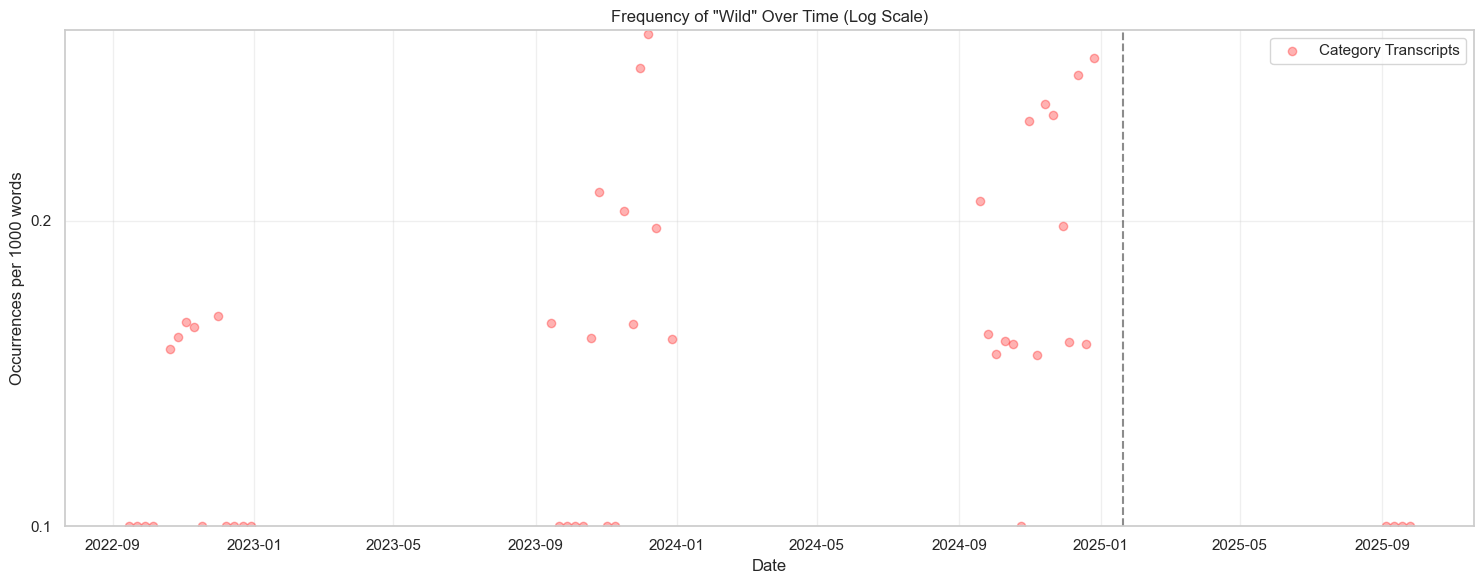


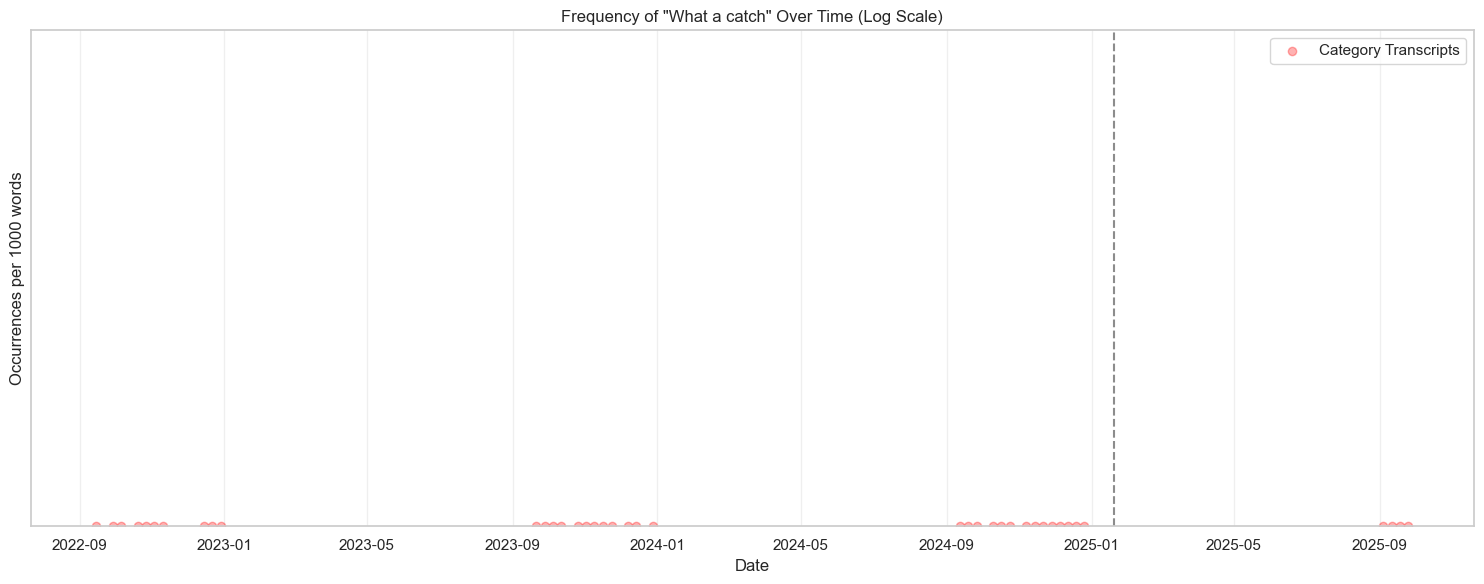


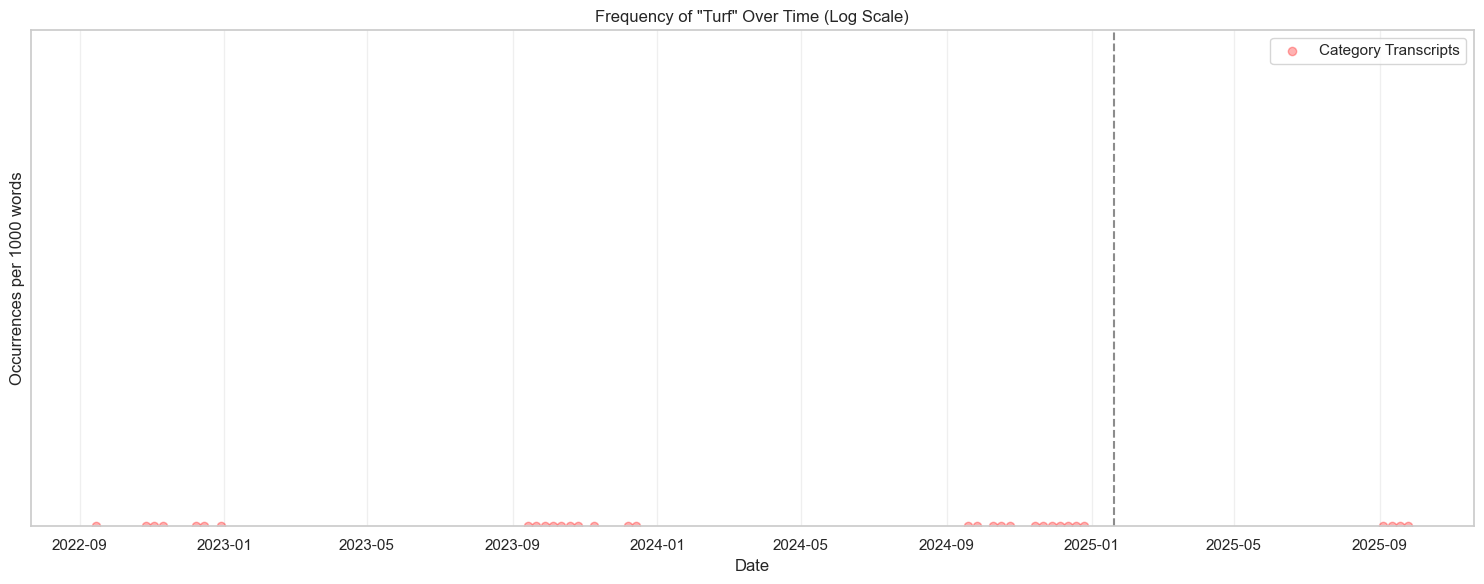


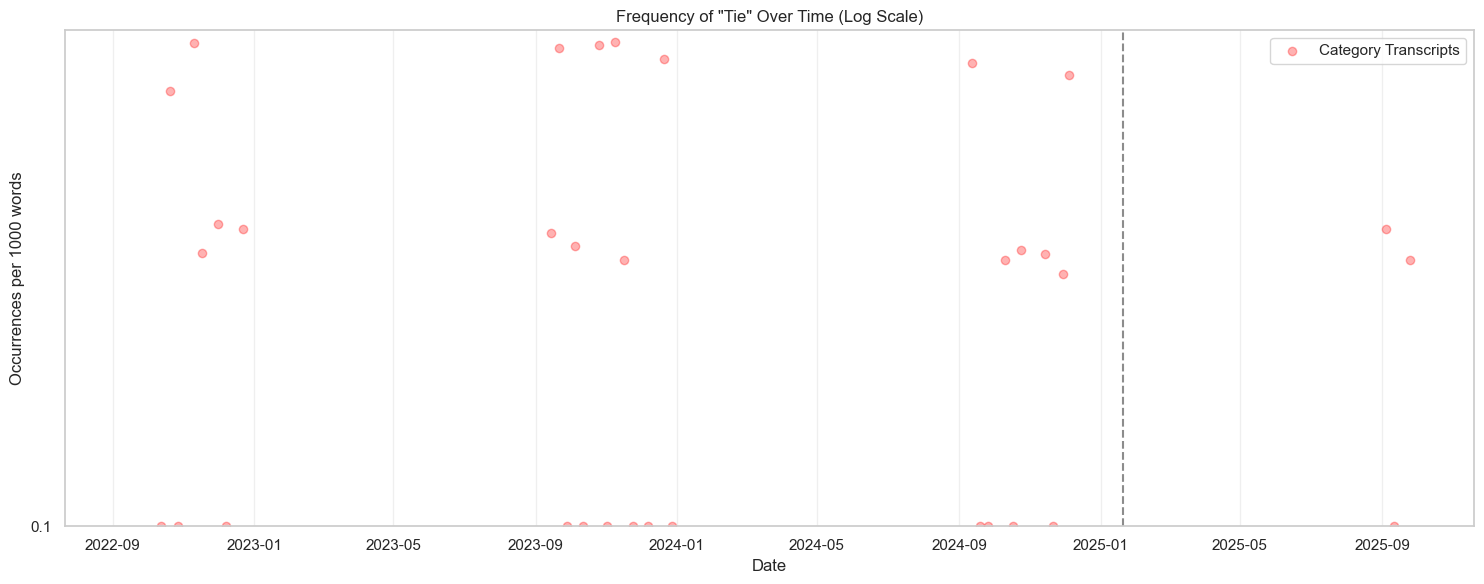


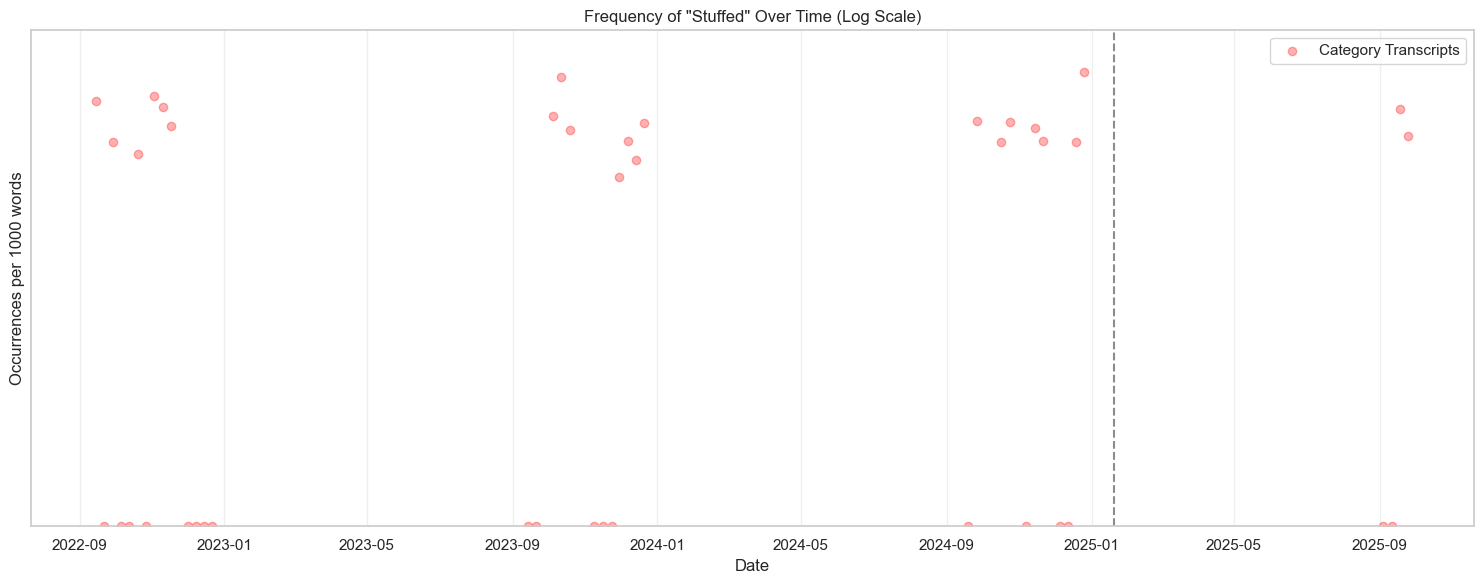


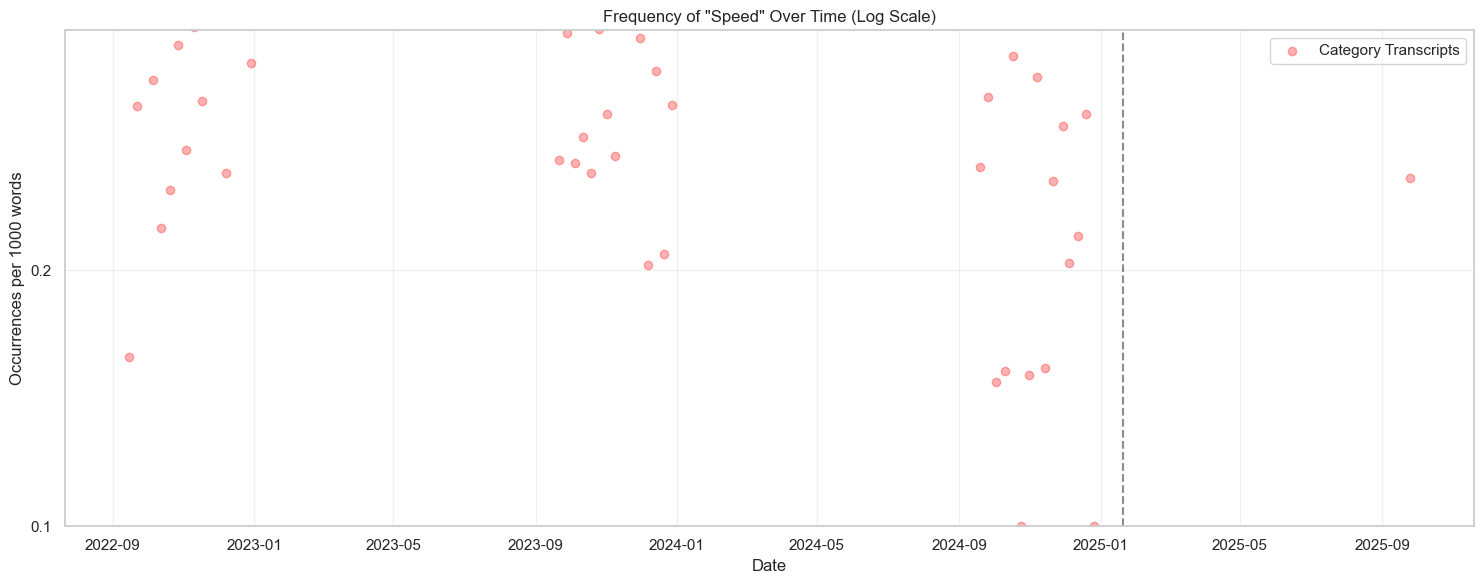


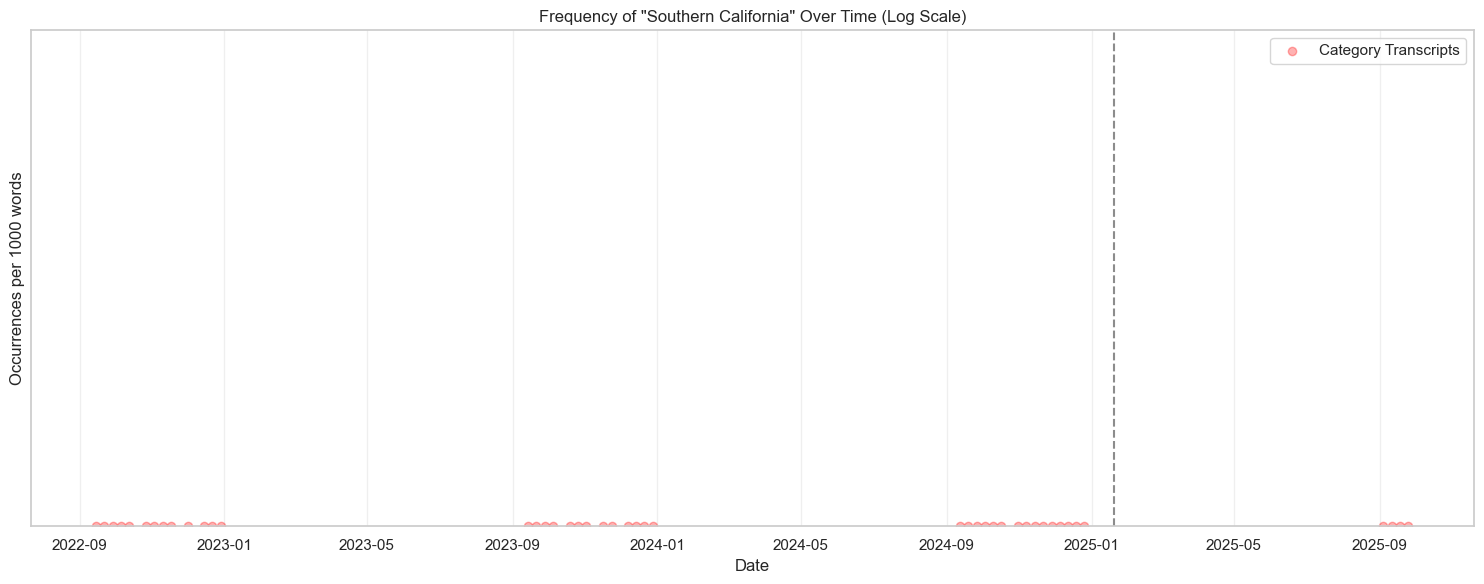


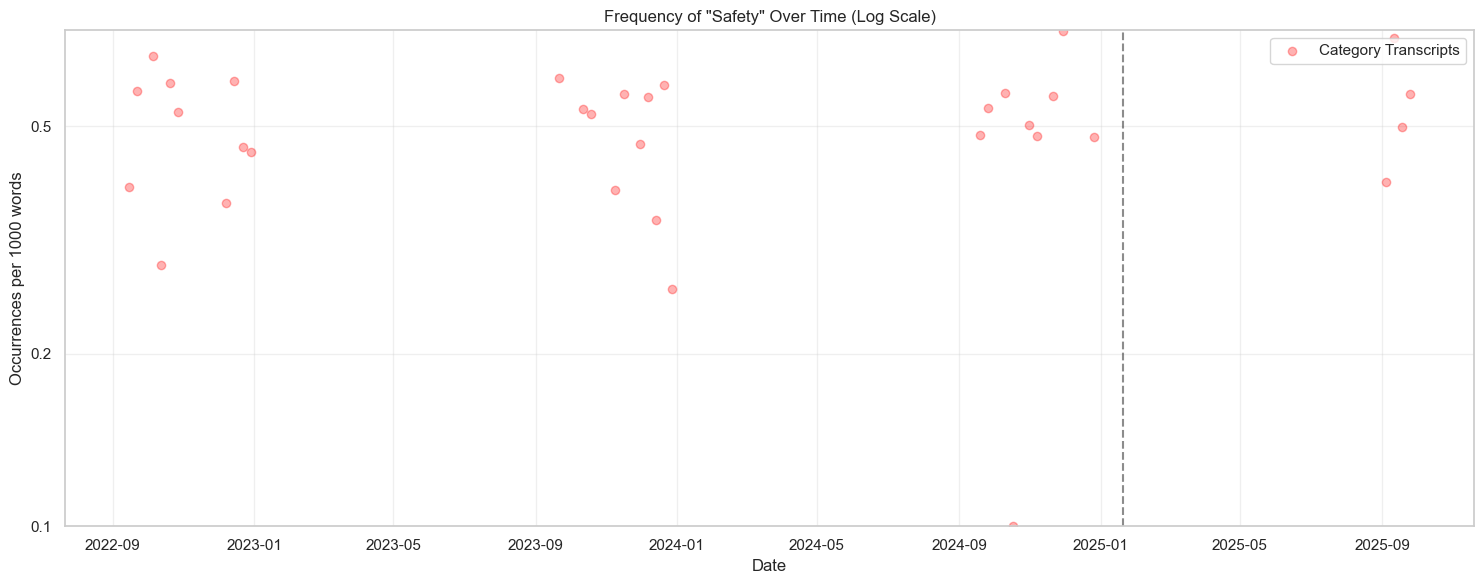


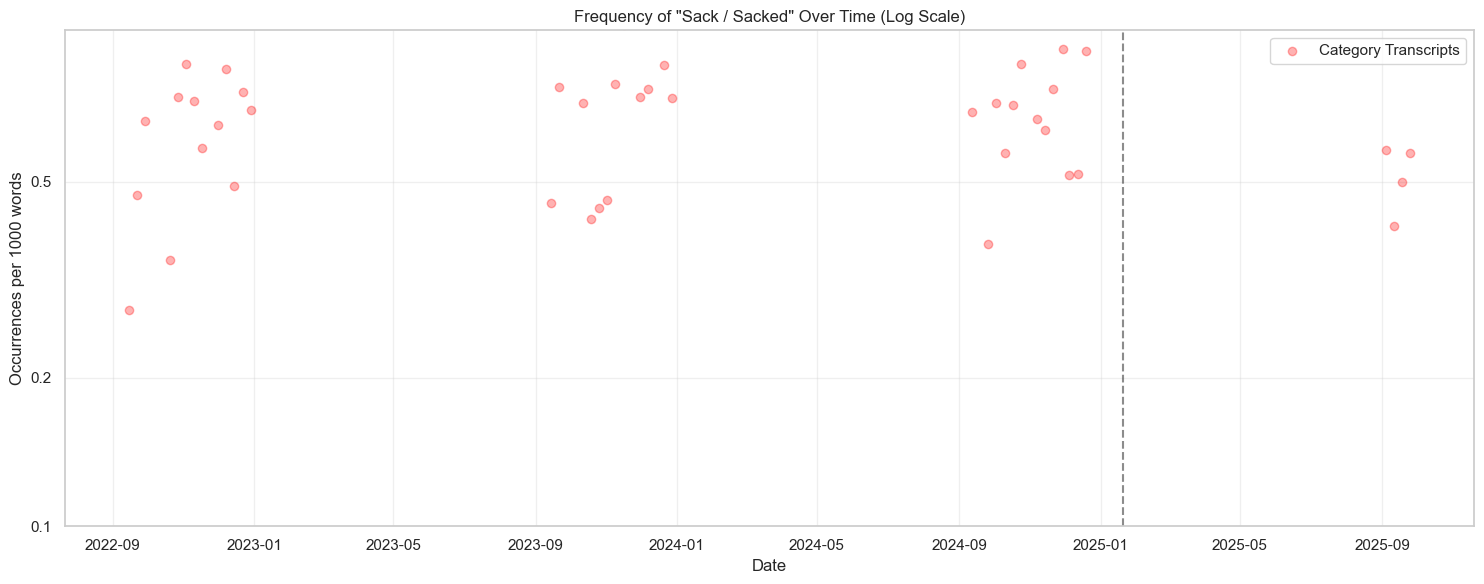


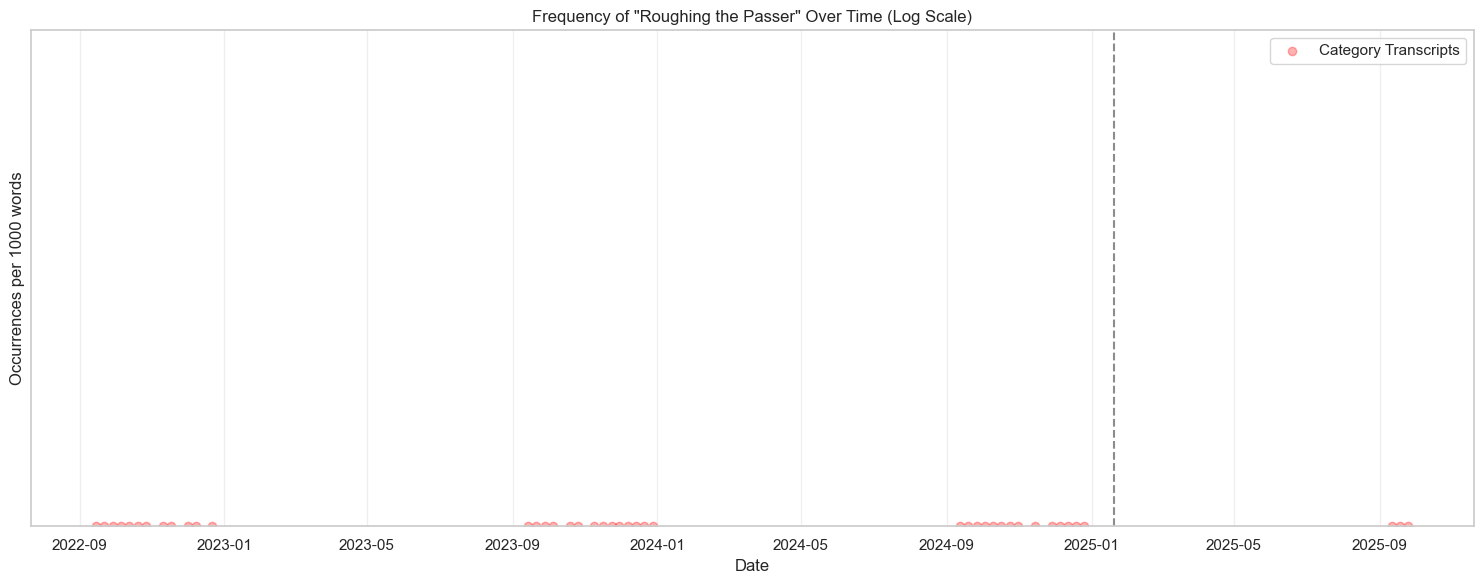


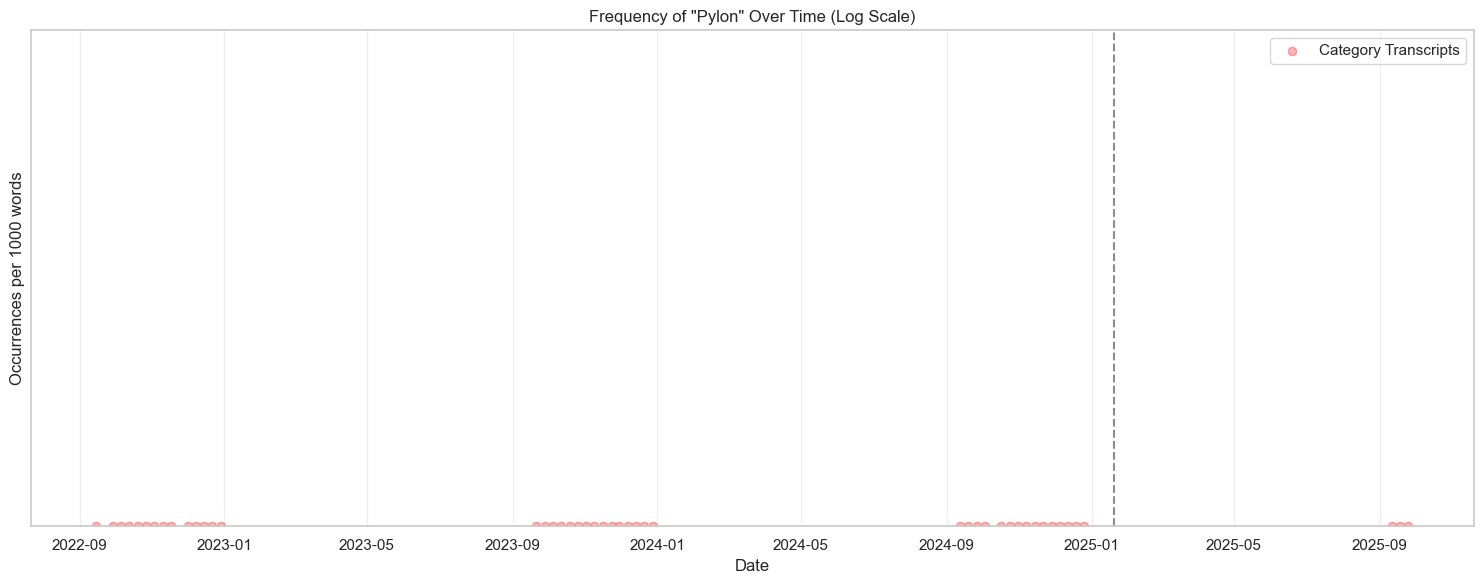


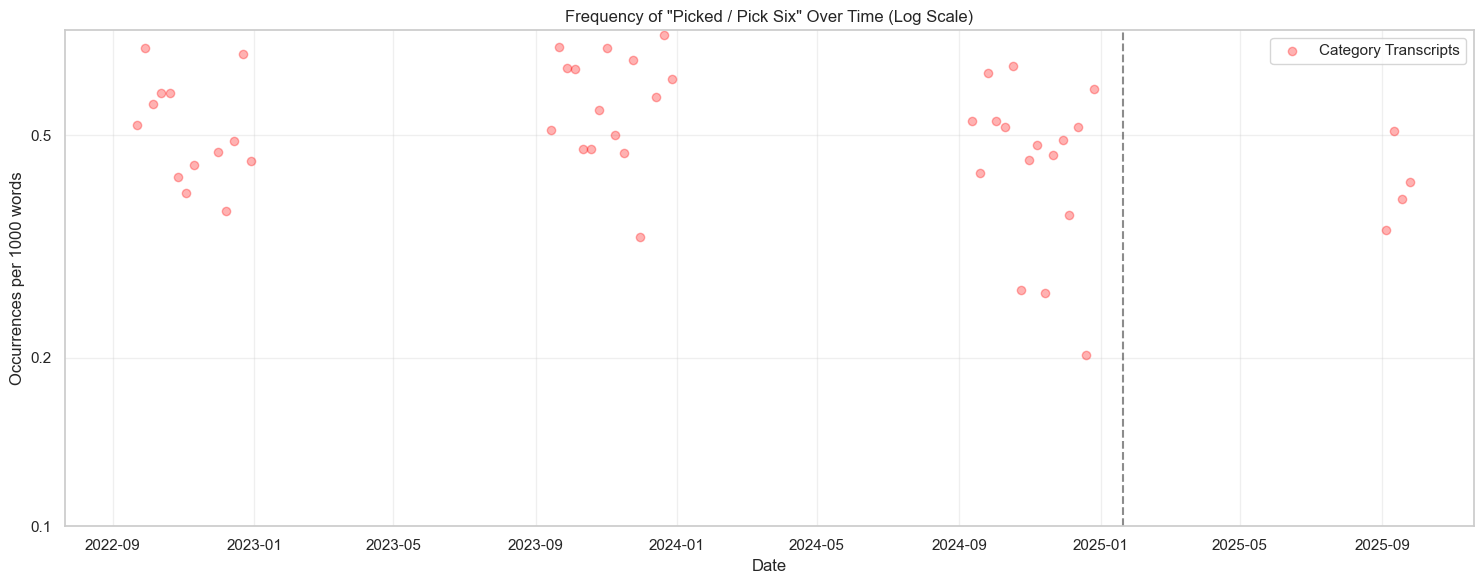


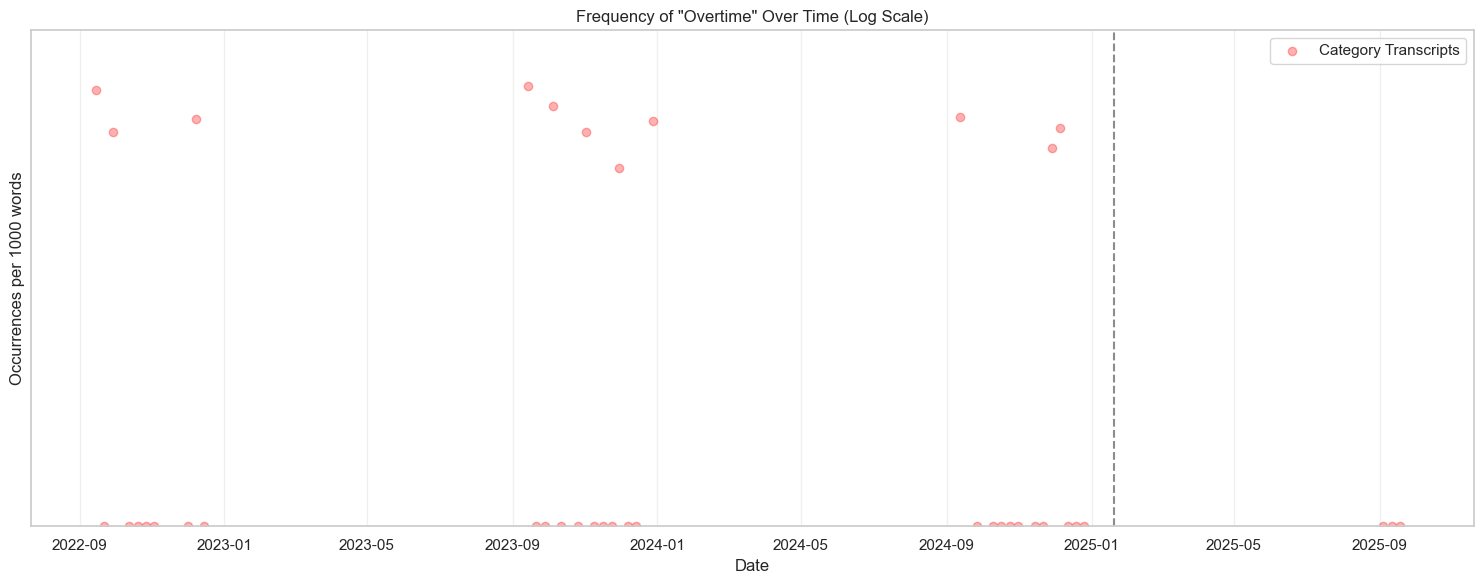


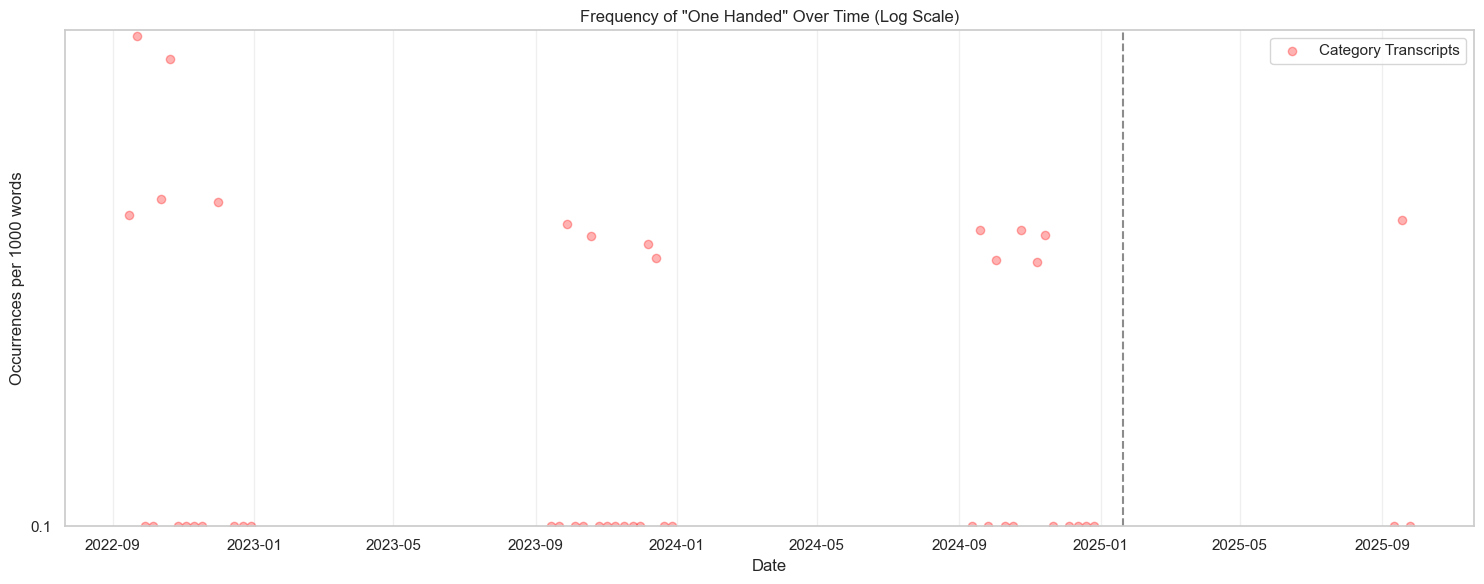


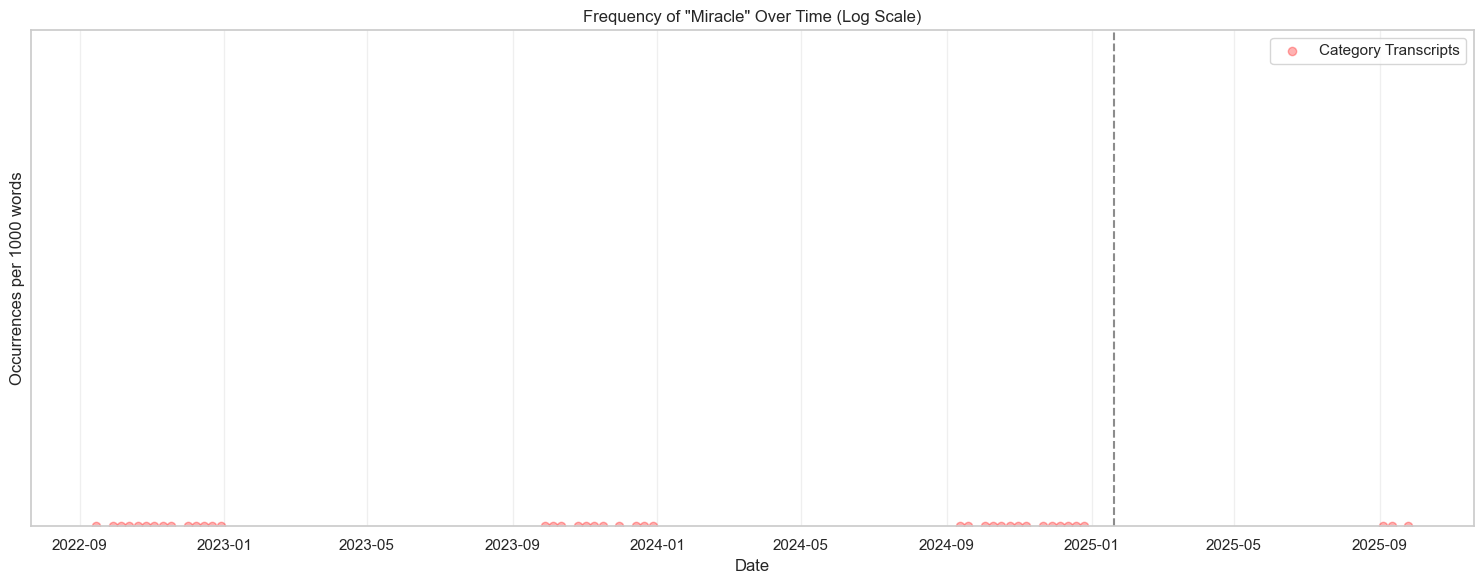


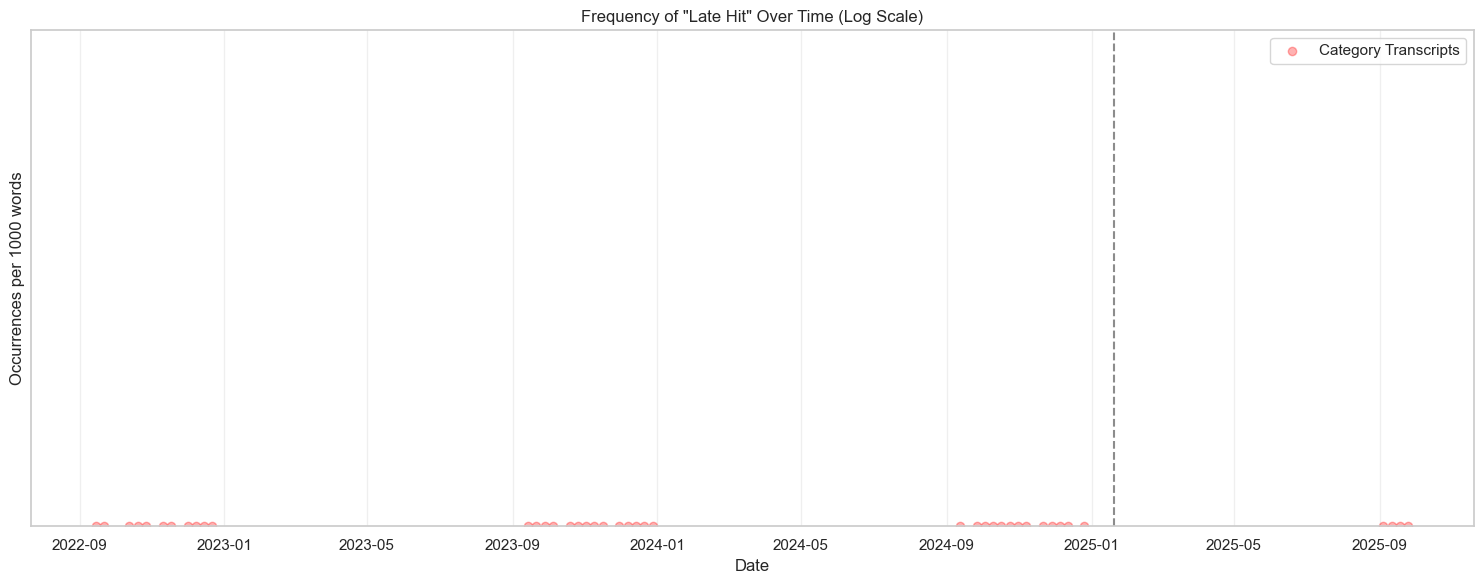


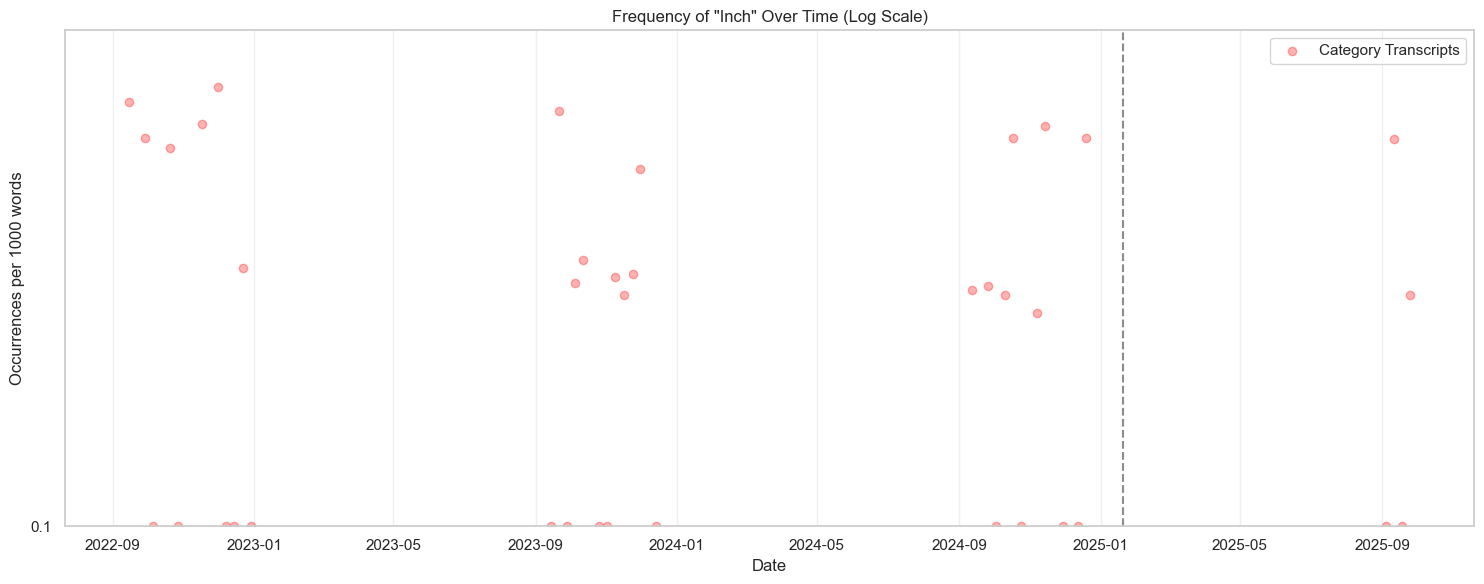


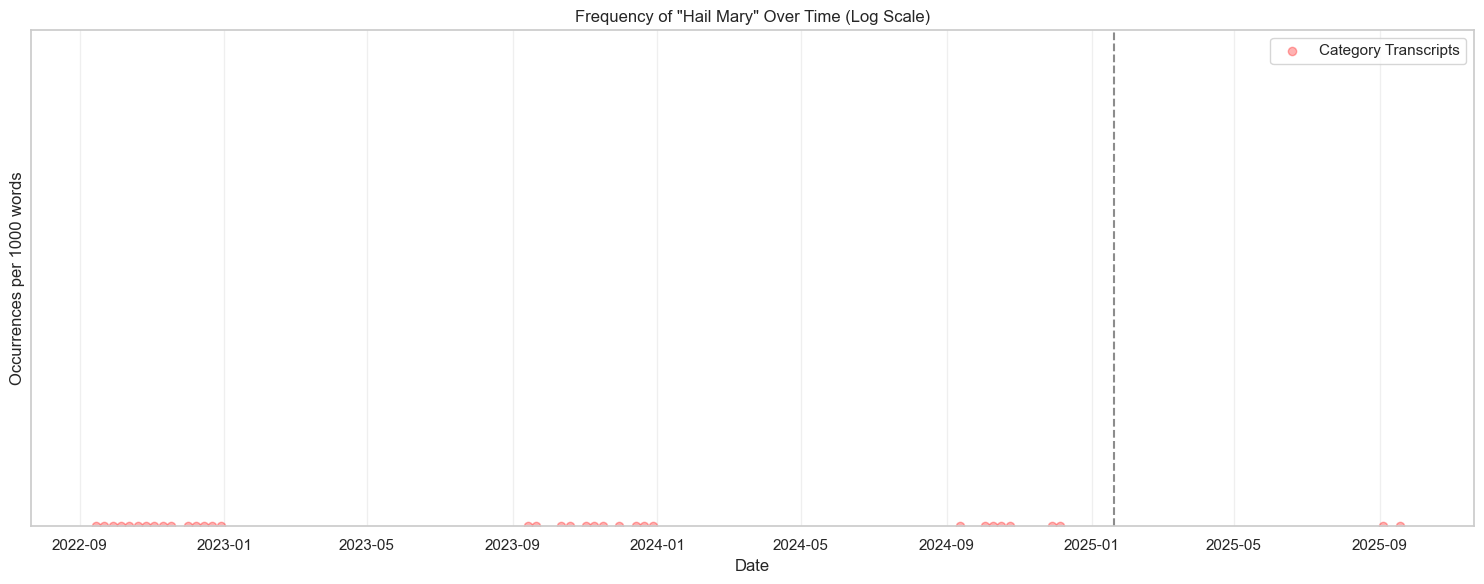


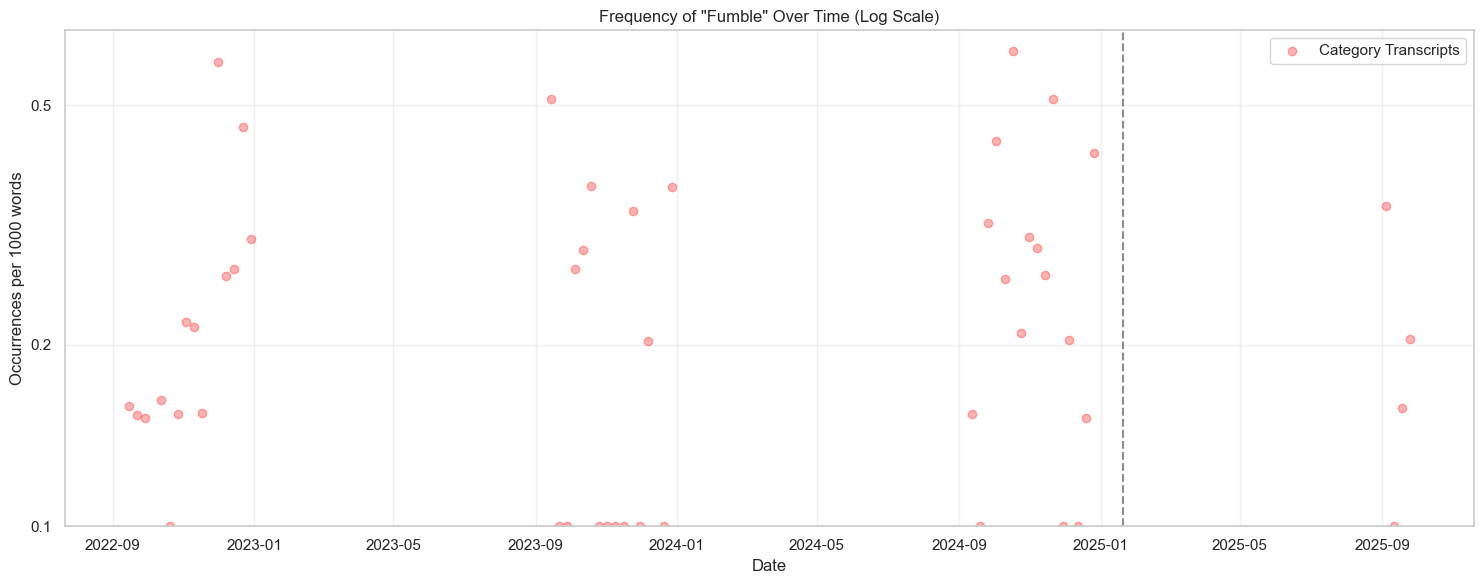


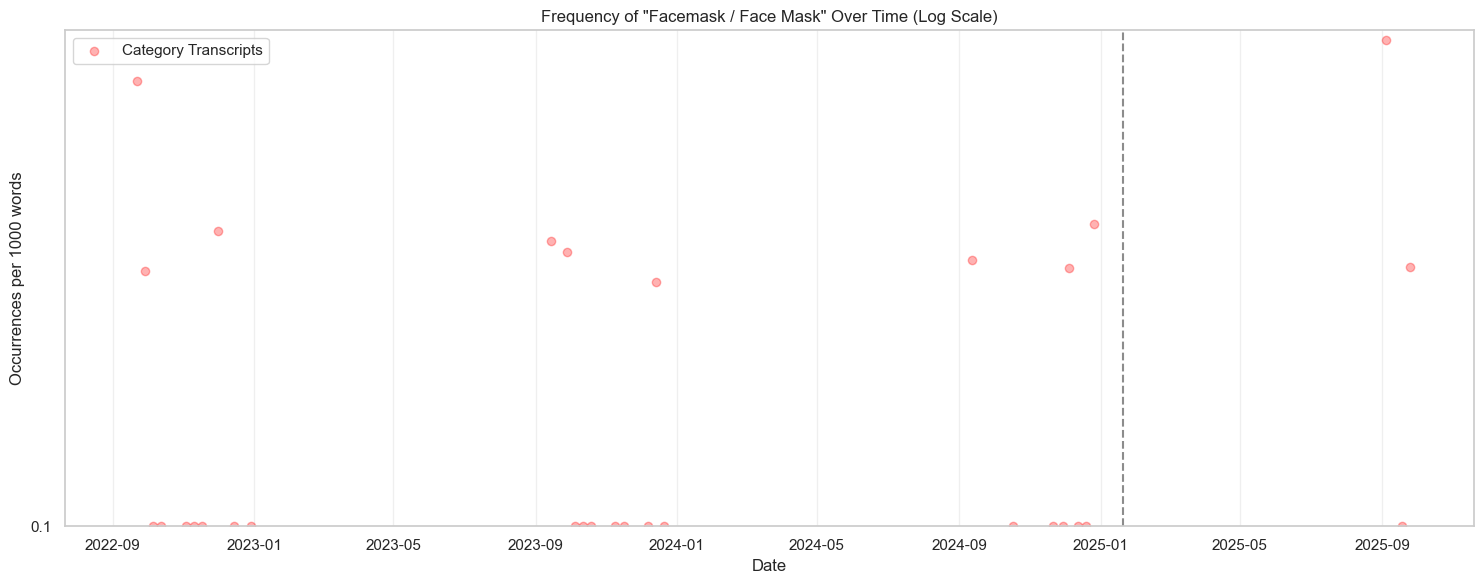


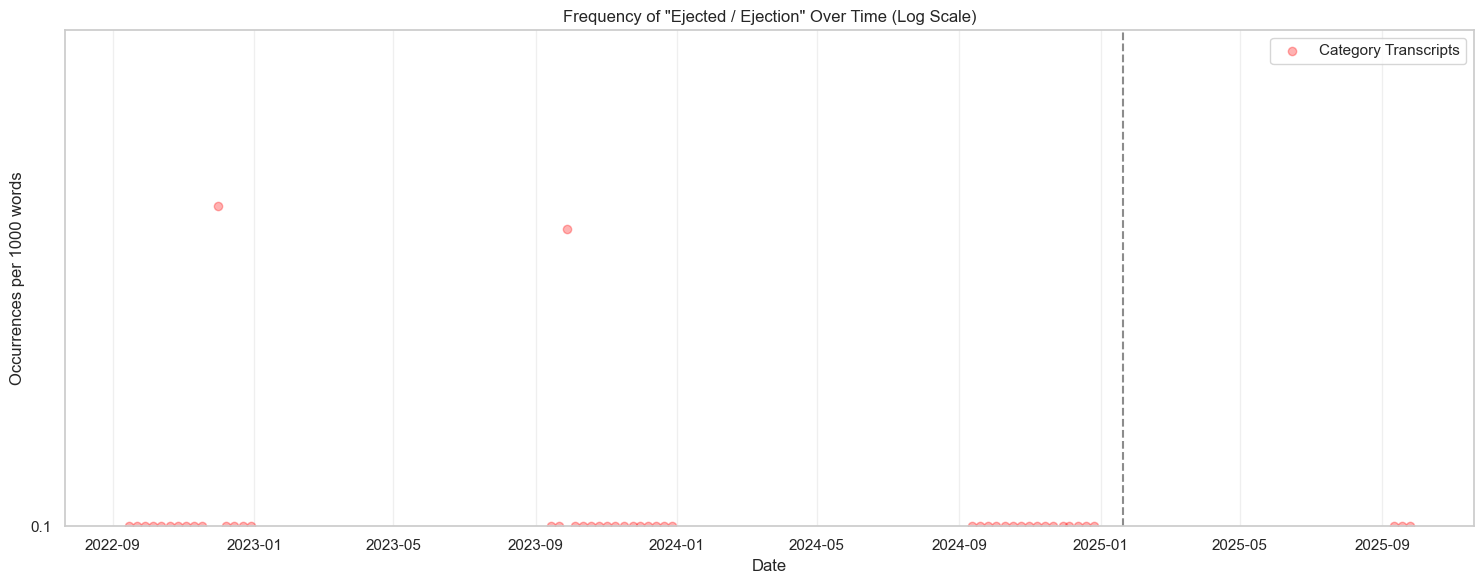


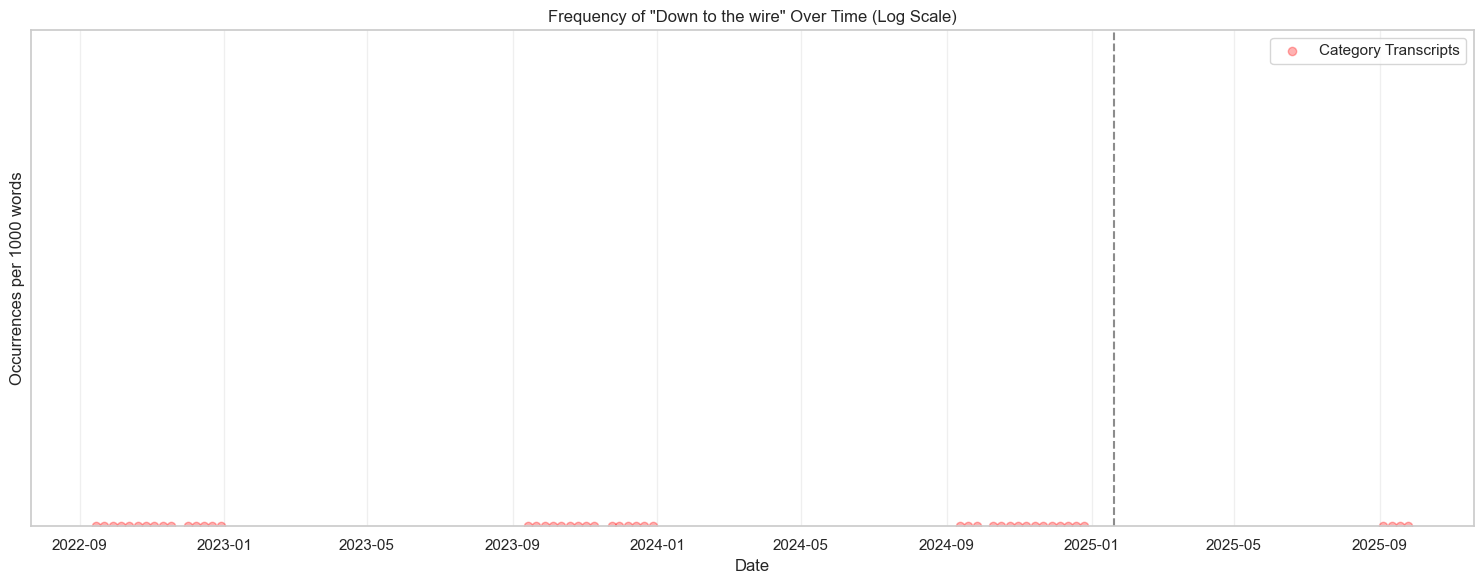


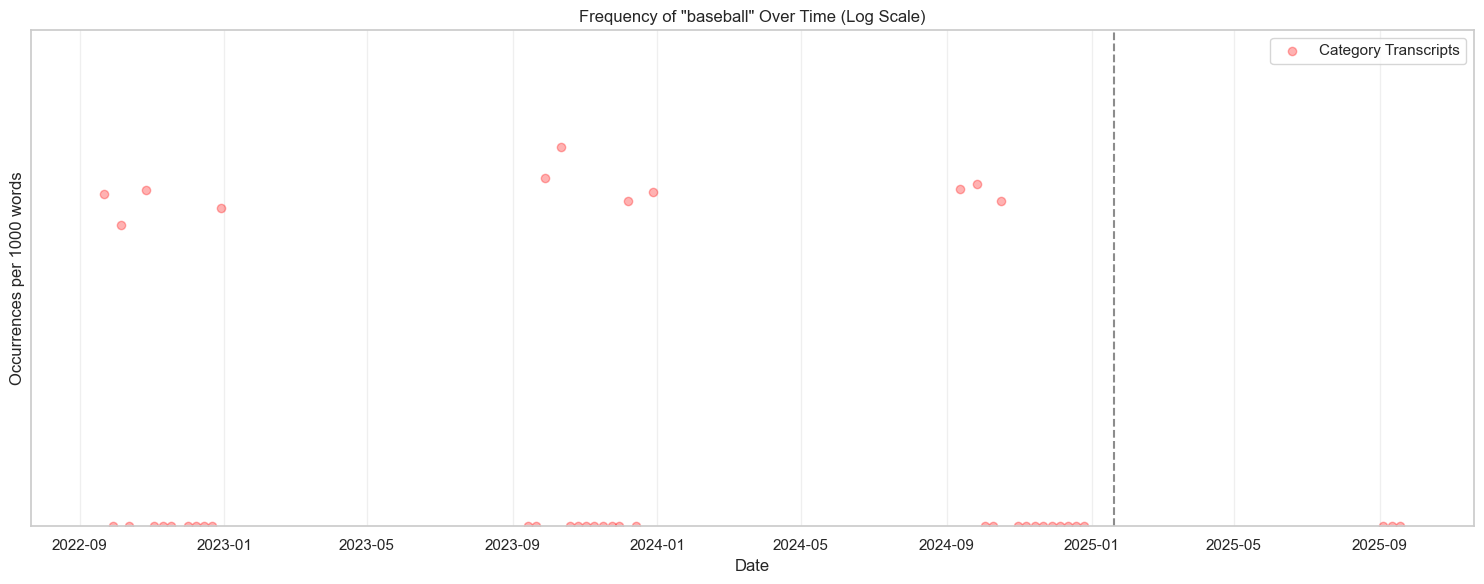


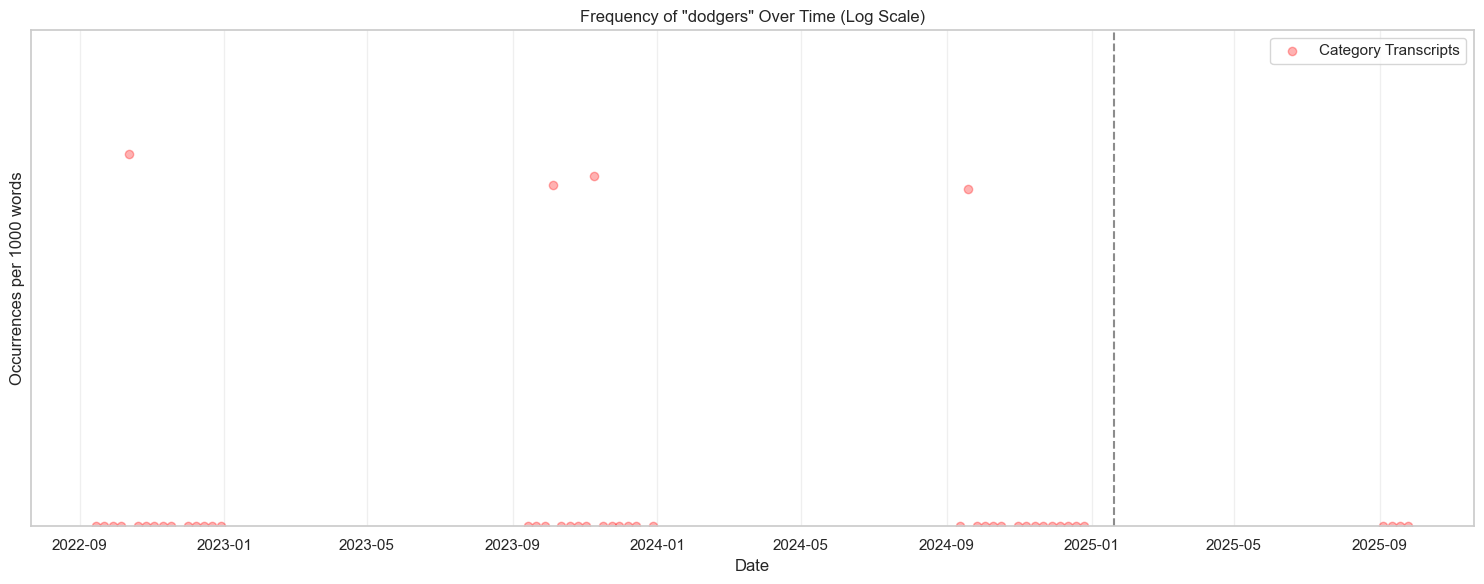

In [7]:
plot_phrase_frequency_over_time_all(df, phrases=SEARCH_PHRASES, log_scale=True, window=100, show_moving_average=False)

In [27]:
teams_df = df[df['file'].str.contains('san francisco|49ers|los angeles|rams', case=False, na=False)]
len(teams_df)


7

In [24]:
analyze_files_phrase_occurrences(teams_df, SEARCH_PHRASES)

Found 7 matching files:

  2023-12-21_saints-at-rams.txt
  2022-12-15_49ers-at-seahawks.txt
  2022-12-08_raiders-at-rams.txt
  2023-09-21_giants-at-49ers.txt
  2024-12-12_rams-at-49ers.txt
  2024-10-24_vikings-at-rams.txt
  2024-10-10_49ers-at-seahawks.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:552: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows[sort_columns].sum(axis=1)


,2023-12-21_saints-at-rams.txt,2022-12-15_49ers-at-seahawks.txt,2022-12-08_raiders-at-rams.txt,2023-09-21_giants-at-49ers.txt,2024-12-12_rams-at-49ers.txt,2024-10-24_vikings-at-rams.txt,2024-10-10_49ers-at-seahawks.txt,Average
Word Count,18330,17986,18735,17726,16775,18283,19131,18138.000000
Sack / Sacked,14,7,14,12,7,14,9,11.000000
Safety,9,9,5,9,19,13,9,10.428571
Picked / Pick Six,12,7,5,11,7,3,8,7.571429
Speed,2,7,3,3,2,0,1,2.571429
Facemask / Face Mask,0,0,3,4,0,4,4,2.142857
Tie,2,3,0,2,3,1,1,1.714286
Fumble,0,3,3,0,0,2,3,1.571429
dodgers,3,0,0,0,0,7,0,1.428571
Wild,6,0,0,0,3,0,1,1.428571



Summary:
Total files processed: 7
Total word count: 126,966


In [10]:
analyze_files_phrase_occurrences(df[df['file'].str.contains('seahawks-at-cardinals|test-16k', case=False, na=False)], SEARCH_PHRASES)

Found 2 matching files:

  seahawks-at-cardinals-amazon.txt
  2025-09-25_seahawks-at-cardinals.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:552: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows[sort_columns].sum(axis=1)


,seahawks-at-cardinals-amazon.txt,2025-09-25_seahawks-at-cardinals.txt,Average
Word Count,65669,19132,42400.500000
Sack / Sacked,22,9,15.500000
Picked / Pick Six,23,6,14.500000
Fumble,24,2,13.000000
Safety,11,9,10.000000
baseball,12,6,9.000000
Speed,10,3,6.500000
Tie,9,1,5.000000
Overtime,7,3,5.000000
Turf,10,0,5.000000



Summary:
Total files processed: 2
Total word count: 84,801


Expected length from category data: 19467 words


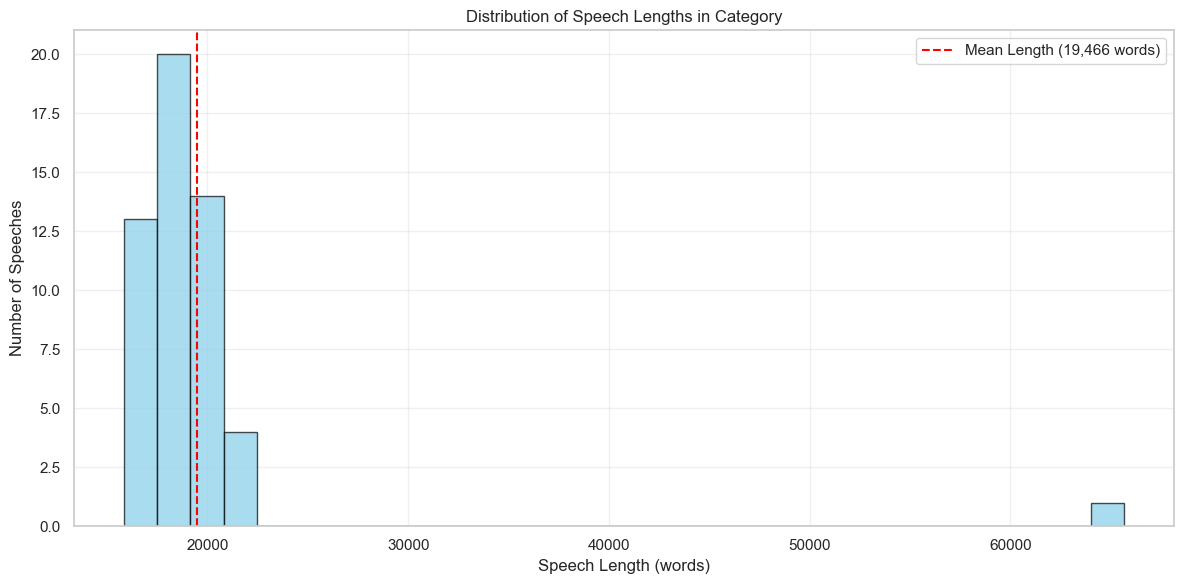

5 shortest transcripts by word count:


,file,date,text_length
42,2024-12-26_seahawks-at-bears.txt,2024-12-26,15826
18,2023-10-12_broncos-at-chiefs.txt,2023-10-12,16060
34,2022-10-13_commanders-at-bears.txt,2022-10-13,16137
15,2022-12-01_bills-at-patriots.txt,2022-12-01,16331
17,2022-12-22_jaguars-at-jets.txt,2022-12-22,16682


In [11]:
plot_length_distribution(df)
# Print the 5 shortest transcripts by word count
print("5 shortest transcripts by word count:")
display(df.nsmallest(5, 'text_length')[['file', 'date', 'text_length']])


In [12]:
length = 1681

## Poisson Predictions

The most naive approach is to use the past frequency of a phrase over a given time period to forecast the probability of a phrase occurring during the expected length of a future speech. Using the Poisson distribution, we assume each word is independent and identically distributed. This allows us to compute threshold probabilities for a phrase occurring a given number of times, which can be compared to the prediction market's implied probability. However, this approach does not account for the clear dependence between words in a speech. This approach can still be useful for analyzing mentions where mostly independent occurrences might be expected (America, God, etc.) 

In [13]:
# Calculate predictions from different data sources
print("using length: ", length)
predictions_all = calculate_poisson_predictions(df, length, SEARCH_PHRASES)

print("Predictions based on all appearances:")
display(format_prediction_table(predictions_all))

predictions_recent = calculate_poisson_predictions(df_recent, length, SEARCH_PHRASES)

print("Predictions based on recent appearances:")
display(format_prediction_table(predictions_recent))


using length:  1681
Predictions based on all appearances:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
8,Sack / Sacked,1.07,0.639,647,65.9%
7,Safety,0.93,0.552,559,60.5%
11,Picked / Pick Six,0.72,0.428,433,51.3%
5,Speed,0.41,0.245,248,33.8%
18,Fumble,0.29,0.173,175,25.2%
3,Tie,0.18,0.107,108,16.4%
19,Facemask / Face Mask,0.16,0.093,94,14.5%
16,Inch,0.15,0.088,89,13.7%
0,Wild,0.12,0.068,69,10.8%
12,Overtime,0.10,0.058,59,9.3%


NameError: name 'df_recent' is not defined

## Negative Binomial 

A more general model that accounts for overdispersion. The dispersion parameter r is estimated using the method of moments, and it controls how much extra variance there is compared to a Poisson distribution. As r approaches infinity, the negative binomial converges to a Poisson distribution (in practice we use r=100 to approximate this). Values closer to 0 indicate that the data is overdispersed.

In [ ]:
print("using length: ", length)

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions))

print("Negative Binomial Predictions based on recent appearances:")
nb_predictions_recent = calculate_negative_binomial_predictions(df_recent, length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions_recent))


using length:  1681
Negative Binomial Predictions based on all appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
15,Drone,3.70,0.60,26.41,69.3%,0.426
6,Putin,2.43,0.61,12.06,62.6%,0.324
10,Missile,2.31,0.35,17.75,50.6%,0.270
13,Fund / Funding,1.21,0.31,5.93,38.9%,0.160
19,Ceasefire,1.02,0.15,7.78,26.8%,0.122
12,Future,0.98,0.48,2.96,41.3%,0.130
1,Unity,0.93,0.23,4.69,31.0%,0.121
3,Trump,0.82,0.26,3.39,30.8%,0.107
4,Soldier,0.62,0.13,3.51,20.5%,0.078
9,Mission,0.24,0.10,0.86,11.5%,0.028


Negative Binomial Predictions based on recent appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
15,Drone,4.24,1.09,20.75,82.2%,0.540
6,Putin,3.92,1.36,15.25,84.1%,0.542
10,Missile,1.83,1.40,4.23,69.0%,0.277
13,Fund / Funding,1.83,0.56,7.84,55.6%,0.253
3,Trump,1.71,0.70,5.84,58.0%,0.244
19,Ceasefire,0.63,0.51,1.42,33.6%,0.072
12,Future,0.51,0.38,1.18,27.5%,0.056
9,Mission,0.19,0.20,0.37,12.5%,0.015
1,Unity,0.13,0.10,0.35,7.8%,0.011
16,Donbas,0.13,100.00,0.10,11.9%,0.000


## Recent Usage in context

In [22]:
from importlib import reload
import src.phrase_analysis as phrase_analysis
reload(phrase_analysis)
get_recent_contexts_all = phrase_analysis.get_recent_contexts_all


get_recent_contexts_all(df, SEARCH_PHRASES, n=20)




=== Recent usage of 'Wild' ===

Title: 2024-12-26_seahawks-at-bears.txt
Date: 2024-12-26 (transcripts)
Context: ...le begins this drive. traveling for a gain of one. And just to add on to that, let's take a look at our next-gen stats, powered by AWS. NFC playoff probabilities, the south and the west, plus the one wild card that's available. And you can see the commanders and Rams in really good position. And Falcons and the Bucs, we'll see how that shapes up here in the next couple weeks. And the Seahawks just hol...

Title: 2024-12-26_seahawks-at-bears.txt
Date: 2024-12-26 (transcripts)
Context: ...yard field goal, and now Chicago has to take a timeout here. Oh, baby. The crowd knows it. I mean, they've already seen this clock management. Helped to create the coaching change after Thanksgiving. Wild card game coming up. I want to remind you, the weekend of January 11th and 12th. Prime video left. One of the wild card games for you. First ever playoff game on Prime. So right now you'l

## Per-Speech Frequencies


In [29]:

nfl_rams_df = df_nfl[df_nfl['file'].str.contains('los angeles|st louis|rams', case=False, na=False)]
print(len(nfl_rams_df))

get_per_appearance_frequency({'nfl': df_nfl, 'nfl_recent': nfl_recent, 'since_2017': df_nfl[df_nfl['date'] > datetime(2017, 1, 1)], 'teams': teams_df, 'tnf': df, 'nfl_rams': nfl_rams_df}, SEARCH_PHRASES)


36
Percentage of Appearances Containing Each Phrase:


,nfl,nfl_recent,since_2017,teams,tnf,nfl_rams
# of files,601.00,208.00,114.00,7.00,51.00,36.00
Average word count,18021.14,19633.63,20373.91,18138.00,18560.82,19653.94
Safety,96.67,99.52,100.00,100.00,98.04,97.22
Picked / Pick Six,94.51,97.60,98.25,100.00,100.00,100.00
Sack / Sacked,92.01,98.56,99.12,100.00,100.00,83.33
Speed,90.52,97.12,97.37,85.71,96.08,97.22
Fumble,83.03,83.65,84.21,57.14,74.51,88.89
Tie,74.21,75.00,66.67,85.71,72.55,88.89
Inch,58.24,56.25,57.02,42.86,68.63,63.89
Facemask / Face Mask,47.75,50.00,50.00,57.14,60.78,50.00
